In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_excel('new_final_df.xlsx')

In [ ]:
outcome_cols = [col for col in df.columns if 'outcome_contact' in col]

In [ ]:
outcome_cols

['outcome_contact1',
 'outcome_contact2',
 'outcome_contact3',
 'outcome_contact4',
 'outcome_contact5',
 'outcome_contact6',
 'outcome_contact7',
 'outcome_contact8',
 'outcome_contact9',
 'outcome_contact10']

In [ ]:
value_counts_dict = {}
for col in outcome_cols:
    value_counts = df[col].value_counts()
    value_counts_dict[col] = value_counts

In [ ]:
all_values = set()
for col in df[outcome_cols]:
    all_values.update(df[col].unique())

value_counts_df = pd.DataFrame({col: value_counts_dict[col] for col in df[outcome_cols]}, index=sorted(all_values))

In [ ]:
value_counts_df.dropna(axis=0, how='all', inplace=True)

In [ ]:
value_counts_df.fillna(0, inplace=True)

In [ ]:
value_counts_df = value_counts_df.astype(int)

In [ ]:
value_counts_df

,outcome_contact1,outcome_contact2,outcome_contact3,outcome_contact4,outcome_contact5,outcome_contact6,outcome_contact7,outcome_contact8,outcome_contact9,outcome_contact10
1.0,405,339,299,98,38,18,11,12,3,7
2.0,513,478,356,140,65,39,26,22,9,2
3.0,227,157,123,70,43,30,24,14,9,4
5.0,13,11,1,5,0,0,0,0,1,0
6.0,549,364,280,165,122,70,46,29,29,21
7.0,37,28,17,11,7,4,3,1,2,3


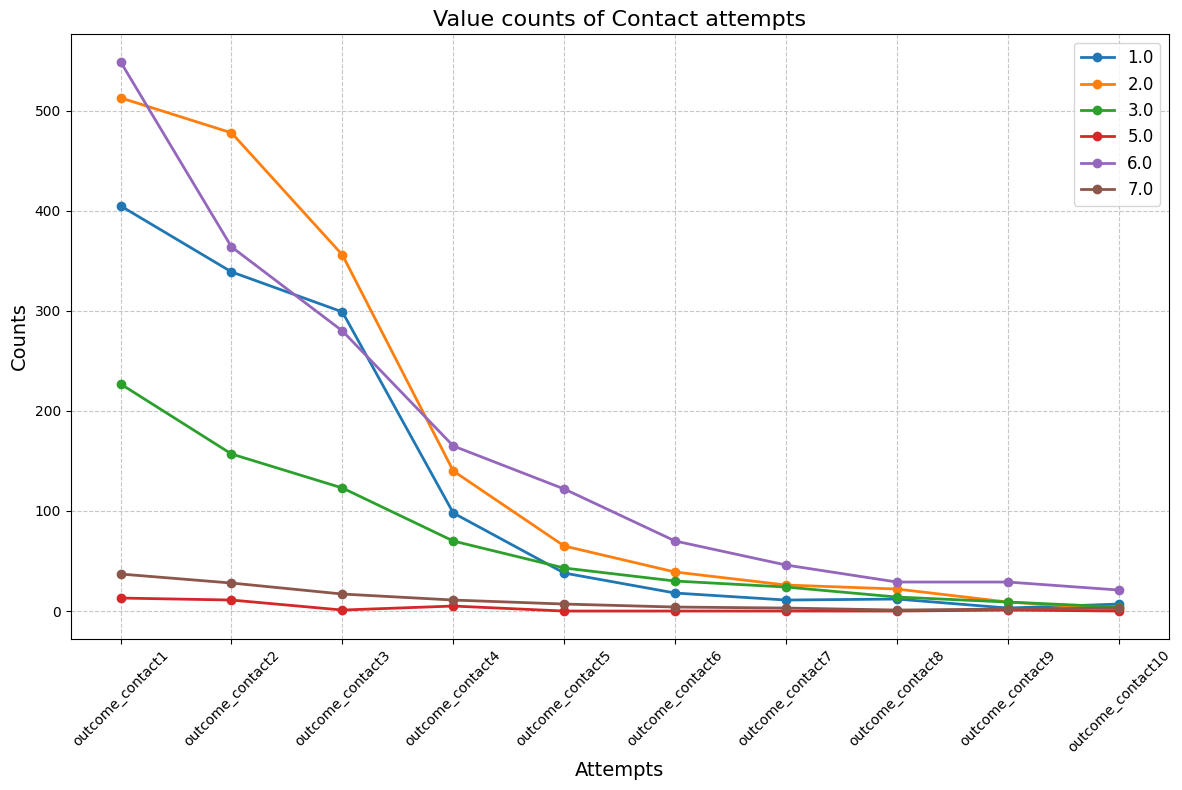

In [ ]:
plt.figure(figsize=(12, 8))

# Each row becomes a line with distinct color
for i, row_name in enumerate(value_counts_df.index):
    plt.plot(value_counts_df.columns, value_counts_df.loc[row_name], marker='o', linestyle='-', linewidth=2,
             label=f'{row_name}')

# Customize the plot
plt.title('Value counts of Contact attempts', fontsize=16)
plt.xlabel('Attempts', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='best', fontsize=12)
plt.xticks(rotation=45)

# Adjust layout to make sure everything fits
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
contact_responses_text_dict = {}
contact_responses_list = [1.0, 2.0, 3.0, 5.0, 6.0, 7.0]
for response in contact_responses_list:
  contact_responses_text_dict[f'response_text_{int(response)}'] = ''
for i in range(1, 11):
  for row in df.index:
    for response in contact_responses_list:
      if df[f'outcome_contact{i}'][row] == response:
        if pd.isna(df[f'notes_contact{i}'][row]):
          continue
        contact_responses_text_dict[f'response_text_{int(response)}'] = contact_responses_text_dict[f'response_text_{int(response)}'] + str(df[f'notes_contact{i}'][row])

In [ ]:
contact_responses_text_dict.keys()

dict_keys(['response_text_1', 'response_text_2', 'response_text_3', 'response_text_5', 'response_text_6', 'response_text_7'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


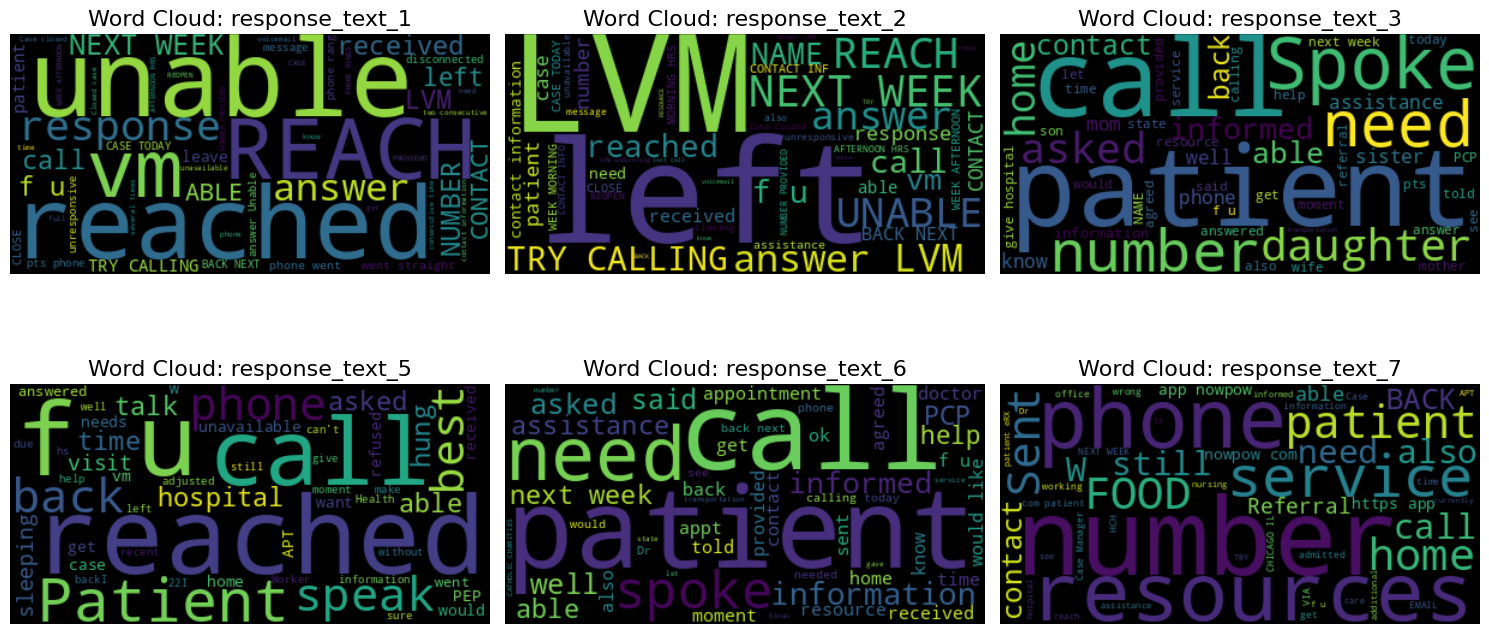

In [ ]:
# Word clouds for each of key value pairs in the dict seperately
# import english stopwords
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
# Calculate grid dimensions
n_items = len(contact_responses_text_dict)
n_cols = min(3, n_items)  # Max 3 columns
n_rows = (n_items + n_cols - 1) // n_cols

# Create figure
plt.figure(figsize=(5*n_cols, 4*n_rows))

# Process each key-value pair
for i, (key, value) in enumerate(contact_responses_text_dict.items()):
    # Convert value to string if it's a list
    if isinstance(value, list):
        text = ' '.join(str(item) for item in value)
    else:
        text = str(value)
    # common_words = {word for word, count in word_category_count.items()
    #                if count >= common_threshold}
    common_words = list(stop_words)
    common_words.extend(['pt', 'stated', 'called'])
    # Create word cloud
    wordcloud = WordCloud(
                          max_words=50,
                          contour_width=1,
                          stopwords=common_words,
                          contour_color='steelblue').generate(text)

    # Plot in subfigure
    plt.subplot(n_rows, n_cols, i+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud: {key}", fontsize=16)
    plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('day_readmit', axis=1), df['day_readmit'], test_size=0.2, random_state=42)
print(y_train.value_counts())
print(y_test.value_counts())

day_readmit
0.0    1504
1.0     511
2.0       3
Name: count, dtype: int64
day_readmit
0.0    384
1.0    118
2.0      1
Name: count, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('day_readmit', axis=1), df['day_readmit'], test_size=0.2, random_state=28)
print(y_train.value_counts())
print(y_test.value_counts())

day_readmit
0.0    1517
1.0     494
2.0       4
Name: count, dtype: int64
day_readmit
0.0    371
1.0    135
Name: count, dtype: int64


In [ ]:
X_train['engaged'].value_counts()

,count
engaged,
0,1382
1,708


In [ ]:
X_test['engaged'].value_counts()

,count
engaged,
0,361
1,162


,count
day_readmit,
0.0,1504
1.0,511
2.0,3


,count
day_readmit,
0.0,384
1.0,118
2.0,1
